In [4]:
pip install folium

     -------------------------------------- 100.0/100.0 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 2.9 MB/s eta 0:00:00
     ------------------------------------ 133.2/133.2 kB 984.0 kB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


# 광진구 인구현황 지도 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False
import folium
import json

people = pd.read_csv('서울특별시_광진구_인구현황_20231231.csv', encoding='cp949') #index_col='행정기관'
new_people = people.drop(0, axis=0)
print(new_people)

geo='EMD_Seoul.geojson'
geo_str=json.load(open(geo, encoding='utf-8'))

gwangjin=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
folium.Choropleth(geo_data=geo_str, data=new_people, columns=['행정기관', '계'],
                    fill_color='Blues',fill_opacity=1,line_opacity=0.5, key_on='feature.properties.ADM_DR_NM').add_to(gwangjin) 
gwangjin

    행정기관      계  인구수(남)  인구수(여)  지역(구성비)  구성비(남)  구성비(여)     성비    세대수  세대당인구
1   중곡1동  15239    7215    8024     4.54    2.15    2.39  89.92   8651   1.76
2   중곡2동  20521    9639   10882     6.12    2.87    3.24  88.58  10572   1.94
3   중곡3동  15727    7761    7966     4.69    2.31    2.37  97.43   8518   1.85
4   중곡4동  27594   13441   14153     8.22    4.01    4.22  94.97  13066   2.11
5     능동  11097    5085    6012     3.31    1.52    1.79  84.58   6480   1.71
6   구의1동  23127   11060   12067     6.89    3.30    3.60  91.65  13100   1.77
7   구의2동  25610   12219   13391     7.63    3.64    3.99  91.25  11485   2.23
8   구의3동  27840   13148   14692     8.30    3.92    4.38  89.49  12051   2.31
9    광장동  33971   16440   17531    10.12    4.90    5.22  93.78  11855   2.87
10  자양1동  21833   10576   11257     6.51    3.15    3.35  93.95  11985   1.82
11  자양2동  23628   11467   12161     7.04    3.42    3.62  94.29  10913   2.17
12  자양3동  27221   13001   14220     8.11    3.87    4.24  91.43 

# 광진구 인구현황 원그래프

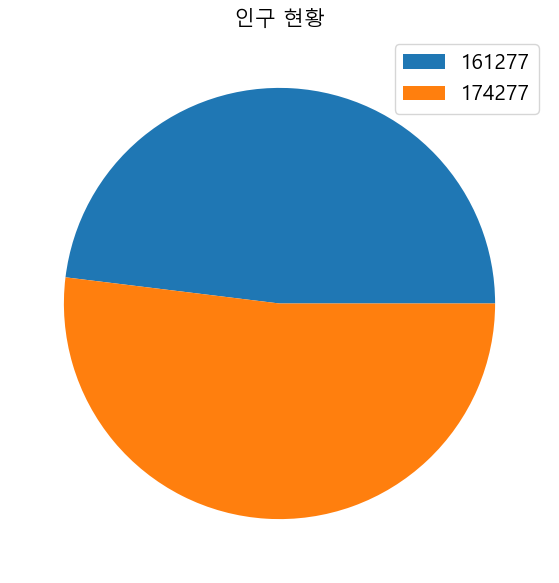

In [46]:
df = pd.read_csv('서울특별시_광진구_인구현황_20231231.csv', encoding='cp949')
new_df = df.drop(0, axis=0)
#print(new_df)
new_df=new_df.iloc[:,2:4]
new_df=new_df.sum(axis=0)
plt.figure(figsize=(12,7))
plt.title('인구 현황', fontsize=15)
plt.pie(new_df)
plt.legend(new_df)
plt.show()

In [89]:
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  headers = {"Authorization": "KakaoAK 2ab787c37f03349a696c88ff323d4815"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

# test = get_location('서울특별시 광진구 용마산로146')
# test.values()

# 광진구 가로쓰레기통 설치정보 지도 시각화

In [90]:
df = pd.read_excel('서울특별시 가로쓰레기통 설치정보_202312.xlsx', usecols='B:D', skiprows=4)

df1 = df.loc[df['자치구명'] == '광진구', ['자치구명', '설치위치(도로명 주소)', '세부 위치']]
df1['설치위치(도로명 주소)'] = '서울특별시 광진구 ' + df1['설치위치(도로명 주소)'].map(str)

# geo='EMD_Seoul.geojson'
# geo_str=json.load(open(geo, encoding='utf-8'))

# gwangjin=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
# folium.Choropleth(geo_data=geo_str, data=df1, columns=['설치위치(도로명 주소)'],
#                     fill_color='Blues',fill_opacity=1,line_opacity=0.5, key_on='feature.properties.ADM_DR_NM').add_to(gwangjin) 
# gwangjin

new_df=df1.loc[:,['설치위치(도로명 주소)']]
latitude = []
longtitude = []
#new_df.rename(columns={'설치위치(도로명 주소)':'address'}, inplace=True)

for i in new_df['설치위치(도로명 주소)']:
    a = get_location(i)
    a2 = list(a.values())
    latitude.append(a2[0])
    longtitude.append(a2[1])

address_df = pd.DataFrame({'자치구명': df1['자치구명'],'도로명 주소': new_df['설치위치(도로명 주소)'],'위도':latitude,'경도':longtitude})
address_df

# mean_lat=address_df['위도'].mean()
# mean_lon=address_df['경도'].mean()

gwangjin_trash=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
#print(len(address_df.index))
for i in address_df.index:
    name = address_df.loc[i, '도로명 주소']
    lat = address_df.loc[i, '위도']
    lng = address_df.loc[i, '경도']
    marker = folium.Marker([lat,lng], popup=name)
    marker.add_to(gwangjin_trash)
gwangjin_trash

In [5]:
df12 = pd.read_excel('국토교통부_전국 버스정류장 위치정보_20231016.xlsx')
df12 = df12.loc[df12['도시명'] == '서울특별시', ['정류장명', '위도', '경도']]
df12
gwangjin_bus=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
#print(len(address_df.index))
for i in df12.index:
    lat = df12.loc[i, '위도']
    lng = df12.loc[i, '경도']
    marker = folium.Marker([lat,lng])
    marker.add_to(gwangjin_bus)
gwangjin_bus.save('bus.html')

In [6]:
dfsubway=pd.read_excel('광진구 지하철역정보.xlsx')
gwangjin_subway=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
#print(len(address_df.index))
for i in dfsubway.index:
    lat = dfsubway.loc[i, '위도']
    lng = dfsubway.loc[i, '경도']
    marker = folium.Marker([lat,lng])
    marker.add_to(gwangjin_subway)
gwangjin_subway.save('subway.html')
gwangjin_subway

# 데이터프레임 합치기

In [21]:
# people_df=pd.DataFrame({'행정기관':new_people['행정기관'], '계':new_people['계']})
# #new_people=new_people.loc[:,['행정기관', '계']]
# people_df.to_excel('광진구 빅데이터 인구현황 모델링용.xlsx', index=False)

In [24]:
address_df.to_excel('광진구 빅데이터 가로쓰레기통 설치정보 모델링용.xlsx', index=False)

In [4]:
file1=pd.read_excel('광진구 빅데이터 가로쓰레기통 설치정보 모델링용.xlsx')
file2=pd.read_excel('인구수 비례 행정동 배출량 수정.xlsx')
result=pd.merge(file1, file2)
result_df=pd.DataFrame(data=result)
result_df

,자치구명,도로명 주소,위도,경도,중곡동,능동,구의동,광장동,자양동,화양동,군자동
0,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389
1,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389
2,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389
3,광진구,서울특별시 광진구 강변역로 50,37.534539,127.094184,941,2274,100,37,102,3865,389
4,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389
...,...,...,...,...,...,...,...,...,...,...,...
96,광진구,서울특별시 광진구 강변역로40-2,37.536199,127.093538,941,2274,100,37,102,3865,389
97,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389
98,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389
99,광진구,서울특별시 광진구 천호대로 606,37.554806,127.084667,941,2274,100,37,102,3865,389


# 역지오코딩 (격자 중심점 위경도 주소로 변환)

In [2]:
pip install geopy

     -------------------------------------- 125.4/125.4 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address
#127.07707901192498, 37.564353971374679
address = geocoding_reverse('37.564353971374679, 127.07707901192498')
print(address)

타이어365, 긴고랑로, 중곡1동, 광진구, 서울특별시, 04937, 대한민국


In [71]:
import requests, json, pprint

def get_address(lat, lng):
    url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x="+lng+"&y="+lat
    headers = {"Authorization": "KakaoAK 2ab787c37f03349a696c88ff323d4815"}
    api_json = requests.get(url, headers=headers)
    full_address = json.loads(api_json.text)

    return full_address

In [76]:
geo=json.load(open('광진구_geojson.geojson',encoding='utf-8'))
f = pd.json_normalize(geo['features'])
geo_df=pd.DataFrame(data=f['geometry.coordinates'])
# geo_df.loc[0]
# for i in len(geo_df):
#     get_address(geo_df[0], geo_df[1])

dong=[]
latitude=[] #위도
longtitude=[] #경도

for row in geo_df.iterrows():
    a=get_address(str(row[1][0][1]), str(row[1][0][0]))
    dong.append(a['documents'][0]['region_3depth_name'])
    latitude.append(str(row[1][0][1]))
    longtitude.append(str(row[1][0][0]))

gwangjin_cluster_address = pd.DataFrame({'행정동':dong,'위도':latitude,'경도':longtitude})
gwangjin_cluster_address

,행정동,위도,경도
0,구의동,37.54365139993518,127.08511999037722
1,중곡동,37.56435397137468,127.07707901192498
2,구의동,37.55449501050879,127.09298503450513
3,중곡동,37.55991080642796,127.09522006892253
4,광장동,37.53919932462503,127.10099172582608
...,...,...,...
1807,자양동,37.53735392237756,127.08855059873896
1808,면목동,37.57253722748726,127.09741661562688
1809,군자동,37.5499245085957,127.0748963666225
1810,자양동,37.53004966624567,127.06255945440758


In [16]:
geo_df.to_excel('geo_df 엑셀 변환.xlsx', index=False)

In [77]:
gwangjin_cluster_address.to_excel('전체 광진구 100m 격자 주소 위경도 변환.xlsx', index=False)

In [78]:
df=pd.read_excel('전체 광진구 100m 격자 주소 위경도 변환.xlsx')

targets=['구의동', '중곡동', '능동', '광장동', '자양동', '화양동', '군자동']

data_gwangjin_address=df.loc[df['행정동'].isin(targets), ['행정동', '위도', '경도']]
data_gwangjin_address.to_excel('최종 클러스터링용 100m 위경도 변환.xlsx', index=False)

In [2]:
df1=pd.read_excel('최종 클러스터링용 100m 위경도 변환.xlsx')
# '중곡동'=3,'능동'=6,'구의동'=1,'광장동'=0,'자양동'=1,'화양동'=10,'군자동'=1
# if (df1['행정동'] == '중곡동'):
#     df1['인구현황 별 가정쓰레기']=3
df1.loc[(df1['행정동'] == '중곡동'), '인구현황 별 가정쓰레기'] =3
df1.loc[(df1['행정동'] == '능동'), '인구현황 별 가정쓰레기'] =6
df1.loc[(df1['행정동'] == '구의동'), '인구현황 별 가정쓰레기'] =1
df1.loc[(df1['행정동'] == '광장동'), '인구현황 별 가정쓰레기'] =0
df1.loc[(df1['행정동'] == '자양동'), '인구현황 별 가정쓰레기'] =1
df1.loc[(df1['행정동'] == '화양동'), '인구현황 별 가정쓰레기'] =10
df1.loc[(df1['행정동'] == '군자동'), '인구현황 별 가정쓰레기'] =1

df1

,행정동,위도,경도,인구현황 별 가정쓰레기
0,구의동,37.543651,127.085120,1.0
1,중곡동,37.564354,127.077079,3.0
2,구의동,37.554495,127.092985,1.0
3,중곡동,37.559911,127.095220,3.0
4,광장동,37.539199,127.100992,0.0
...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0
1700,자양동,37.537354,127.088551,1.0
1701,군자동,37.549925,127.074896,1.0
1702,자양동,37.530050,127.062559,1.0


In [69]:
#임시
dfweight=df1
dfweight['지하철 여부']=1
dfweight['버스정류장 여부'] = 1
dfweight.loc[(dfweight['행정동'] == '중곡동'), '행정동별 배출량'] =0.8
dfweight.loc[(dfweight['행정동'] == '능동'), '행정동별 배출량'] =0
dfweight.loc[(dfweight['행정동'] == '구의동'), '행정동별 배출량'] =8.4
dfweight.loc[(dfweight['행정동'] == '광장동'), '행정동별 배출량'] =10
dfweight.loc[(dfweight['행정동'] == '자양동'), '행정동별 배출량'] =9.9
dfweight.loc[(dfweight['행정동'] == '화양동'), '행정동별 배출량'] =0.1
dfweight.loc[(dfweight['행정동'] == '군자동'), '행정동별 배출량'] =0.5
dfweight
#df12
#37.531692

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량
0,구의동,37.543651,127.085120,1.0,1,1,8.4
1,중곡동,37.564354,127.077079,3.0,1,1,0.8
2,구의동,37.554495,127.092985,1.0,1,1,8.4
3,중곡동,37.559911,127.095220,3.0,1,1,0.8
4,광장동,37.539199,127.100992,0.0,1,1,10.0
...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,1,1,9.9
1700,자양동,37.537354,127.088551,1.0,1,1,9.9
1701,군자동,37.549925,127.074896,1.0,1,1,0.5
1702,자양동,37.530050,127.062559,1.0,1,1,9.9


In [3]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    두 지점 간의 거리를 계산하는 함수 (단위: km)
    """
    # 지구 반지름 (km)
    R = 6371.0
    
    # 위도와 경도를 라디안으로 변환
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    # Haversine 공식 적용
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance

In [23]:
haversine(37.540372, 127.069276, dfweight['위도'][1], dfweight['경도'][1])

2.753964193434543

In [68]:
dfweight.drop(columns=['clustering'], inplace=True)

In [70]:
#지하철역이랑 광진구 100m 격자 위경도 거리 측정 후 가중치 부여
for i in range(1704):
    #haversine(37.540372, 127.069276, dfweight['위도'][i], dfweight['경도'][i])
   dfweight.at[i, '지하철 여부'] = haversine(37.552031, 127.089609, dfweight['위도'][i], dfweight['경도'][i])

dfweight

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0
...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9


In [31]:
ave_dis = []
average_distance = dfweight['지하철 여부'].mean()
ave_dis.append(average_distance)
ave_dis

[2.1754496286019473]

In [51]:
average_distance = dfweight['지하철 여부'].mean()
ave_dis.append(average_distance)

In [52]:
ave_dis

[2.1754496286019473,
 1.879066844273139,
 2.1478409961480116,
 2.007919891099073,
 1.7344217145801077,
 2.1760908434001243,
 2.46803692267847,
 1.890279499210747]

# 22, 23년도 기준 클러스터링 데이터 셋 구축

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
file=pd.read_excel('최종 클러스터링용 100m 위경도 변환.xlsx')
result_df=pd.DataFrame(data=file)
result_df

,행정동,위도,경도
0,구의동,37.542481,127.085671
1,중곡동,37.560645,127.080092
2,구의동,37.542481,127.085671
3,중곡동,37.560645,127.080092
4,광장동,37.546925,127.103035
...,...,...,...
1699,자양동,37.534547,127.082367
1700,자양동,37.534547,127.082367
1701,군자동,37.555145,127.075903
1702,자양동,37.534547,127.082367


In [6]:
cluster_data=pd.DataFrame(data=result_df)
cluster_data

NameError: name 'result_df' is not defined

# 클러스터링 데이터 프레임 생성

In [55]:
kmeans_cluster_data=pd.DataFrame(data=dfweight)
kmeans_cluster_data

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0
...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9


In [56]:
X = kmeans_cluster_data.iloc[:, :].values
X[:5]

array([['구의동', 37.54365139993518, 127.0851199903772, 1.0,
        1.0123307448735661, 1, 8.4],
       ['중곡동', 37.56435397137468, 127.077079011925, 3.0,
        1.7599709781726138, 1, 0.8],
       ['구의동', 37.55449501050879, 127.0929850345051, 1.0,
        0.40452455289511996, 1, 8.4],
       ['중곡동', 37.55991080642796, 127.0952200689225, 3.0,
        1.0061636992053806, 1, 0.8],
       ['광장동', 37.53919932462503, 127.1009917258261, 0.0,
        1.7443878930543872, 1, 10.0]], dtype=object)

# k-means 클러스터링 및 최적의 K값 찾기 (Elbow method 이용)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = sc.fit_transform(cluster_data[['위도', '경도', '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동']])
X = sc.fit_transform(kmeans_cluster_data.iloc[:,1:])
X[:5]

array([[-0.24909987, -0.05308154, -0.49333761, -0.90430974,  0.        ,
         0.5917536 ],
       [ 1.39741698, -0.6904026 ,  0.28540004,  0.03199659,  0.        ,
        -1.11738727],
       [ 0.61331414,  0.57029512, -0.49333761, -1.66549509,  0.        ,
         0.5917536 ],
       [ 1.0440432 ,  0.74744203,  0.28540004, -0.91203304,  0.        ,
        -1.11738727],
       [-0.60318231,  1.20489861, -0.88270643,  0.01248113,  0.        ,
         0.95157273]])

C:\Users\hdemn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


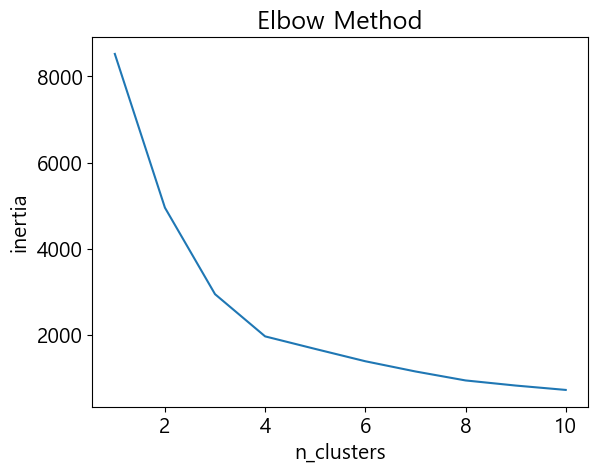

In [58]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [64]:
# kmeans = KMeans(n_clusters=3, random_state=0)
# y_kmeans = kmeans.fit_predict(X)
# y_kmeans

array([2, 1, 2, ..., 1, 2, 2])

In [20]:
pd.set_option('display.max_rows',20)

In [59]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(kmeans_cluster_data.iloc[:, 1:])
labels=kmeans.labels_
centers=kmeans.cluster_centers_
print(labels)
kmeans_cluster_data['clustering']=labels
kmeans_cluster_data

[0 1 0 ... 1 0 0]


,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4,0
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4,0
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0,0
...,...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9,0
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9,0
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5,1
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9,0


In [60]:
k_means_clustering=kmeans_cluster_data['clustering'] > 0
k_means_cluster_result=kmeans_cluster_data[k_means_clustering]
k_means_cluster_result

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
6,중곡동,37.559895,127.090691,3.0,0.879646,1,0.8,1
7,화양동,37.547208,127.071516,10.0,1.682813,1,0.1,2
10,중곡동,37.560781,127.086157,3.0,1.019395,1,0.8,1
...,...,...,...,...,...,...,...,...
1686,능동,37.549031,127.077166,6.0,1.146564,1,0.0,3
1689,능동,37.549957,127.083953,6.0,0.549379,1,0.0,3
1692,중곡동,37.568909,127.090642,3.0,1.878903,1,0.8,1
1698,화양동,37.540014,127.076085,10.0,1.790874,1,0.1,2


In [90]:
k_means_cluster_result.to_excel('k-means 클러스터링 결과.xlsx', index=False)

# gmm 클러스터링

In [61]:
gmm_cluster_data=pd.DataFrame(data=dfweight)
gmm_cluster_data

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0
...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9


In [62]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(gmm_cluster_data.iloc[:, 1:])
predict=gmm.predict(gmm_cluster_data.iloc[:, 1:])
print(predict)
gmm_cluster_data['clustering']=predict
gmm_cluster_data

[0 1 0 ... 1 3 3]


,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4,0
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4,0
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0,3
...,...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9,3
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9,3
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5,1
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9,3


In [63]:
gmm_clustering=gmm_cluster_data['clustering'] > 0
gmm_cluster_result=gmm_cluster_data[gmm_clustering]
gmm_cluster_result

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0,3
6,중곡동,37.559895,127.090691,3.0,0.879646,1,0.8,1
7,화양동,37.547208,127.071516,10.0,1.682813,1,0.1,2
...,...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9,3
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9,3
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5,1
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9,3


In [94]:
gmm_cluster_result.to_excel('gmm 클러스터 결과.xlsx', index=False)

# DBSCAN 클러스터링

In [71]:
dbscan_cluster_data=pd.DataFrame(data=dfweight)
dbscan_cluster_data

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0
...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9


In [72]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=2) # DBSCAN (eps : epsilon, min_samples : min point)
dbscan.fit(dbscan_cluster_data.iloc[:, 1:])
labels=dbscan.labels_
print(labels)
dbscan_cluster_data['clustering']=labels
dbscan_cluster_data

[0 1 0 ... 5 4 4]


,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
0,구의동,37.543651,127.085120,1.0,1.012331,1,8.4,0
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
2,구의동,37.554495,127.092985,1.0,0.404525,1,8.4,0
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0,2
...,...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9,4
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9,4
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5,5
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9,4


In [73]:
dbscan_clustering=dbscan_cluster_data['clustering'] > 0
dbscan_cluster_result=dbscan_cluster_data[dbscan_clustering]
dbscan_cluster_result

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
4,광장동,37.539199,127.100992,0.0,1.744388,1,10.0,2
6,중곡동,37.559895,127.090691,3.0,0.879646,1,0.8,1
7,화양동,37.547208,127.071516,10.0,1.682813,1,0.1,3
...,...,...,...,...,...,...,...,...
1699,자양동,37.528234,127.059175,1.0,3.768572,1,9.9,4
1700,자양동,37.537354,127.088551,1.0,1.634682,1,9.9,4
1701,군자동,37.549925,127.074896,1.0,1.317996,1,0.5,5
1702,자양동,37.530050,127.062559,1.0,3.414966,1,9.9,4


# 클러스터링 후 공통데이터 추출

In [54]:
k_means_cluster_result.equals(filtered_df1)

True

In [74]:
filtered_df1 = k_means_cluster_result[k_means_cluster_result['clustering'].isin(gmm_cluster_result['clustering'])]
filtered_df = filtered_df1.drop_duplicates(subset=['위도', '경도'])
filtered_df

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
6,중곡동,37.559895,127.090691,3.0,0.879646,1,0.8,1
7,화양동,37.547208,127.071516,10.0,1.682813,1,0.1,2
10,중곡동,37.560781,127.086157,3.0,1.019395,1,0.8,1
...,...,...,...,...,...,...,...,...
1686,능동,37.549031,127.077166,6.0,1.146564,1,0.0,3
1689,능동,37.549957,127.083953,6.0,0.549379,1,0.0,3
1692,중곡동,37.568909,127.090642,3.0,1.878903,1,0.8,1
1698,화양동,37.540014,127.076085,10.0,1.790874,1,0.1,2


In [101]:
filtered_df1.to_excel('중복 클러스터링 제외.xlsx', index=False)

# MCLP 알고리즘 적용

In [ ]:
# I=cluster_data.index.values #전체 위경도
# J= #cluster 돌린 후 위치 위경도
# S=500 #최소 쓰레기통 설치 가능 거리 500m 설정
# min_dist=100 #격자 구간 별 거리 100m
# a=cluster_data.clustering.values
# P=20 #20개의 쓰레기통 설치 가정
# N=[[j for j in J if d[i][j] < S] for i in I]
# R=[[int(r)]]

In [ ]:
K=20
r=500
I=cluster_data.index.values
J=
mclp=(I, K, r, J)

In [114]:
df1[['위도', '경도']].values

array([[ 37.5436514 , 127.08511999],
       [ 37.56435397, 127.07707901],
       [ 37.55449501, 127.09298503],
       ...,
       [ 37.54992451, 127.07489637],
       [ 37.53004967, 127.06255945],
       [ 37.52561267, 127.08182473]])

In [14]:
filtered_df[['위도', '경도']].values

array([[ 37.56435397, 127.07707901],
       [ 37.55991081, 127.09522007],
       [ 37.55989519, 127.09069117],
       ...,
       [ 37.54995677, 127.08395295],
       [ 37.56890853, 127.09064185],
       [ 37.54001389, 127.07608458]])

In [75]:
filtered_df['clustering']=1
filtered_df

,행정동,위도,경도,인구현황 별 가정쓰레기,지하철 여부,버스정류장 여부,행정동별 배출량,clustering
1,중곡동,37.564354,127.077079,3.0,1.759971,1,0.8,1
3,중곡동,37.559911,127.095220,3.0,1.006164,1,0.8,1
6,중곡동,37.559895,127.090691,3.0,0.879646,1,0.8,1
7,화양동,37.547208,127.071516,10.0,1.682813,1,0.1,1
10,중곡동,37.560781,127.086157,3.0,1.019395,1,0.8,1
...,...,...,...,...,...,...,...,...
1686,능동,37.549031,127.077166,6.0,1.146564,1,0.0,1
1689,능동,37.549957,127.083953,6.0,0.549379,1,0.0,1
1692,중곡동,37.568909,127.090642,3.0,1.878903,1,0.8,1
1698,화양동,37.540014,127.076085,10.0,1.790874,1,0.1,1


In [ ]:
I = df1[['위도', '경도']].values
J = filtered_df1[['위도', '경도']].values
S = 500
min_dist = 100

a = filtered_df1['clustering'].values
P = 20

# Compute the sets Ni
# NB: this will be a list in which each item is a list of nodes
# within the threshold distance of the i'th node
N = [[j for j in J if d[i][j] < S] for i in I]
R = [[int(r[station_i][station_j] < min_dist) for station_j in J ] for station_i in J]
# Formulate optimisation

prob = LpProblem("MCLP", LpMaximize)
x = LpVariable.dicts("x", J, lowBound=0, upBound=1, cat='Integer')
y = LpVariable.dicts("y", I, lowBound=0, upBound=1, cat='Integer')

# Objective
prob += lpSum([a[i]*y[i] for i in I])

# Constraints
for i in I:
    prob += lpSum([x[j] for j in N[i]]) >= y[i]
for j in J:
    prob += lpSum([x[rr] for rr in R[j]]) <= 1
    

prob += lpSum([x[j] for j in J]) == P

# Solve problem
prob.solve()

x_soln = np.array([x[j].varValue for j in J])

# And print some output
print (("Status:"), LpStatus[prob.status])
print ("Weight Covered is = ", value(prob.objective))
print ("x = ", x_soln)

In [76]:
def distance(point1, point2):
    """
    두 지점 사이의 거리를 계산하는 함수 (유클리드 거리 사용)
    """
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [77]:
def mclp(locations, k):
    """
    MCLP(Maximum Coverage Location Problem)를 그리디 알고리즘을 사용하여 해결하는 함수
    """
    # 초기화
    centers = []
    
    # 첫 번째 센터를 무작위로 선택
    centers.append(locations[np.random.randint(len(locations))])
    
    # 중복을 허용하지 않고 k-1개의 추가 센터 선택
    for _ in range(k - 1):
        max_dist = 0
        new_center = None
        
        # 모든 위치에 대해 가장 먼 센터를 선택
        for location in locations:
            min_dist = min(distance(location, center) for center in centers)
            if min_dist > max_dist:
                max_dist = min_dist
                new_center = location
        
        centers.append(new_center)
    
    return centers

In [95]:
selected_centers = mclp(filtered_df[['위도', '경도']].values, 20)

print("Selected centers:", selected_centers)

Selected centers: [array([ 37.56705797, 127.07706372]), array([ 37.53912872, 127.08061732]), array([ 37.57165507, 127.10308349]), array([ 37.55539635, 127.09298013]), array([ 37.55080533, 127.06923082]), array([ 37.5680072 , 127.09064678]), array([ 37.55535276, 127.08052642]), array([ 37.53999344, 127.07042498]), array([ 37.56173275, 127.10087158]), array([ 37.54725674, 127.08510001]), array([ 37.54632324, 127.07604886]), array([ 37.56257545, 127.08388278]), array([ 37.55983509, 127.07370782]), array([ 37.57068744, 127.08383766]), array([ 37.56803056, 127.09744087]), array([ 37.56170178, 127.09181356]), array([ 37.54448355, 127.06587117]), array([ 37.55717937, 127.08730941]), array([ 37.55352984, 127.07487589]), array([ 37.55177531, 127.08847133])]


In [78]:
def visualize_mclp(selected_centers, locations):
    """
    MCLP 결과를 시각화하는 함수
    """
    # 지도 객체 생성
    m = folium.Map(location=[0, 0], zoom_start=2)
    
    # 선택된 센터 위치를 지도에 추가
    for center in selected_centers:
        folium.Marker(location=center, icon=folium.Icon(color='blue')).add_to(m)
    
#     # 각 위치에서의 커버리지를 원으로 나타내기
#     for location in locations:
#         folium.Circle(
#             location=location,
#             radius=50000,  # 임의의 반경 설정 (커버리지 반경에 따라 조정)
#             color='green',
#             fill=True,
#             fill_color='green'
#         ).add_to(m)
    
    # 결과 지도 출력
    return m

In [96]:
map_with_coverage = visualize_mclp(selected_centers, dfweight[['위도', '경도']].values)

# 결과 지도 저장
map_with_coverage.save('mclp_result.html')

# 기존 가로쓰레기통 위치랑 같이 출력

In [79]:
def visualize_exis_mclp(selected_centers, locations, existing_data):
    """
    MCLP 결과와 기존 데이터를 함께 시각화하여 지도를 생성하는 함수
    """
    # 지도 객체 생성
    m = folium.Map(location=[0, 0], zoom_start=2)
    
     # 기존 데이터를 지도에 추가 (파란색으로 표시)
    for data in existing_data:
        folium.Marker(location=data, icon=folium.Icon(color='blue')).add_to(m)
    
    # 선택된 센터 위치를 지도에 추가 (빨간색으로 표시)
    for center in selected_centers:
        folium.Marker(location=center, icon=folium.Icon(color='red')).add_to(m)
    
    return m

In [166]:
trash_str=address_df[['위도', '경도']].values
trash_float=list(tuple(trash_str.tolist()))
print(type(trash_str))

<class 'numpy.ndarray'>


In [172]:
gwangjin_arr_df1=filtered_df1[['위도', '경도']].values
gwangjin_float=list(gwangjin_arr_df1)
print(type(gwangjin_arr_df1))

<class 'numpy.ndarray'>


In [168]:
print(type(selected_centers))

<class 'list'>


In [85]:
list_locations = dfweight[['위도', '경도']].values.tolist()

In [91]:
exis_data=address_df[['위도', '경도']].values
existing_data=exis_data.tolist()

In [187]:
print(type(list_locations))

<class 'list'>


In [188]:
print(type(existing_data))

<class 'list'>


In [195]:
existing_data = [[float(coord) for coord in location] for location in existing_data]

In [217]:
print(type(existing_data[0][0]))

<class 'float'>


In [218]:
selected_centers = selected_centers.tolist() if isinstance(selected_centers, np.ndarray) else selected_centers

In [220]:
selected_centers

[array([ 37.54540556, 127.07152595]),
 array([ 37.57165507, 127.10308349]),
 array([ 37.56976601, 127.07818081]),
 array([ 37.5544911 , 127.09185289]),
 array([ 37.56710586, 127.09065172]),
 array([ 37.55625006, 127.0793892 ]),
 array([ 37.54093942, 127.0828711 ]),
 array([ 37.56083141, 127.10087639]),
 array([ 37.56253909, 127.07369241]),
 array([ 37.54905942, 127.08509002])]

In [97]:
map_with_coverage = visualize_exis_mclp(selected_centers, list_locations, existing_data)

# 결과 지도를 HTML 파일로 저장
map_with_coverage.save('mclp_with_existing_data.html')

In [93]:
def mclp_with_multiple_exclusions(locations, exclusion_areas, num_centers):
    """
    여러 개의 특정 위도 경도 범위를 제외하고 MCLP를 수행하는 함수
    """
    # 제외할 구역을 고려한 후보 중심 선택
    candidate_centers = locations[:]
    for exclusion_area in exclusion_areas:
        min_lat, max_lat = exclusion_area[0]
        min_lon, max_lon = exclusion_area[1]
        candidate_centers = [location for location in candidate_centers if min_lat > location[0] or location[0] > max_lat or min_lon > location[1] or location[1] > max_lon]

    # MCLP 수행
    selected_centers = mclp(candidate_centers, num_centers)
    
    return selected_centers

In [94]:
exclusion_areas = [((37.5395893, 37.542322), (127.0745273, 127.077793)),((37.545379 ,37.5527691) ,(127.075987 ,127.089609)), ((37.5518658, 37.5801942),(127.0855585, 127.1037574)), ((37.5599817, 37.580646),(127.0705563, 127.0807086))]

In [83]:
#exclusion_areas = [건국대일감호, 어린이대공원, (아차산,용마산), 군자교다리범위제외]

In [98]:
# 제외할 구역을 고려하여 MCLP를 수행
selected_centers = mclp_with_multiple_exclusions(filtered_df[['위도', '경도']].values, exclusion_areas, 20)

print("선택된 중심:", selected_centers)

선택된 중심: [array([ 37.55987145, 127.08389782]), array([ 37.54267672, 127.06474966]), array([ 37.54093942, 127.0828711 ]), array([ 37.5544189 , 127.07147435]), array([ 37.57067943, 127.08157288]), array([ 37.54541376, 127.07378996]), array([ 37.55354606, 127.0794044 ]), array([ 37.55984325, 127.07597226]), array([ 37.53910849, 127.07495778]), array([ 37.54899853, 127.06810914]), array([ 37.55356609, 127.08506503]), array([ 37.56618476, 127.08499505]), array([ 37.55082584, 127.07489125]), array([ 37.54453271, 127.07945504]), array([ 37.54179611, 127.07041464]), array([ 37.56346878, 127.08161322]), array([ 37.55805273, 127.07937906]), array([ 37.55533658, 127.0759978 ]), array([ 37.5391247 , 127.07948541]), array([ 37.54539733, 127.06926194])]


In [100]:
map_with_coverage = visualize_mclp(selected_centers, dfweight[['위도', '경도']].values)
# 결과 지도 저장
map_with_coverage.save('범위제외mclp_result.html')